In [3]:
import pandas as pd
import seaborn as sns
import warnings
from datetime import timedelta
import numpy as np

In [7]:
data = pd.read_excel('AQI.xlsx')
data.rename(columns={'UTC Hour':'Hour'}, inplace=True)
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
data.index = data['datetime']
data.Hour = data.index.hour # UTC hour to UTC

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
a = data.groupby('Risk')
a['Risk'].count()

Risk
Good                              21994
Moderate                           1550
Unhealthy for sensitive groups        5
Name: Risk, dtype: int64

In [10]:
data.head()

,Year,Month,Day,Hour,dayofweek,dayofweek.1,dayofyear,PM2.5,Risk,datetime
datetime,,,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,5,Thu,63,62.9,Moderate,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,5,Thu,63,62.9,Moderate,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,5,Thu,63,55.5,Moderate,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,5,Thu,63,55.5,Moderate,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,5,Thu,63,47.9,Good,2016-03-03 19:00:00


In [11]:
data['season'] = pd.cut(data['Month'],bins=[0,2,5,10,12],right=True,labels=['Winters','Summer','Rainy','Winter'])

In [12]:
data['season'].replace({'Winters':'Winter'}, inplace=True)

In [13]:
data['season'].replace({'Winters':'Winter'}, inplace=True)

C:\Users\Poom__000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


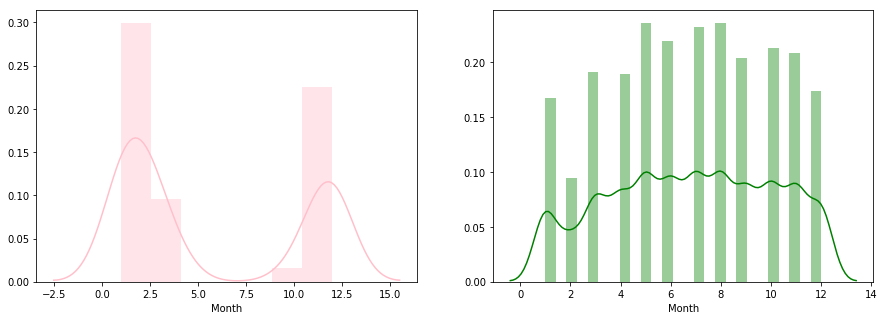

In [14]:
fi = plt.figure(figsize=(15,5))
axes = fi.add_subplot(121)
sns.distplot(data[data['Risk']=='Moderate' ]['Month'],color='pink')
axes = fi.add_subplot(122)
sns.distplot(data[data['Risk']=='Good']['Month'],color='green')

In [15]:
data['Risk'].unique()

array(['Moderate', 'Good', 'Unhealthy for sensitive groups'], dtype=object)

In [16]:
data['Risk'].replace({'Unhealthy for sensitive groups':'Unhealthy'}, inplace=True)

C:\Users\Poom__000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


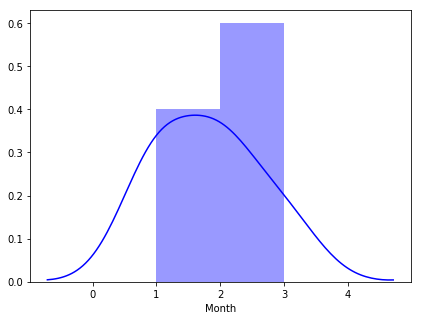

In [17]:
fi = plt.figure(figsize=(15,5))
axes = fi.add_subplot(122)
sns.distplot(data[data['Risk']=='Unhealthy']['Month'],color='blue')

C:\Users\Poom__000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


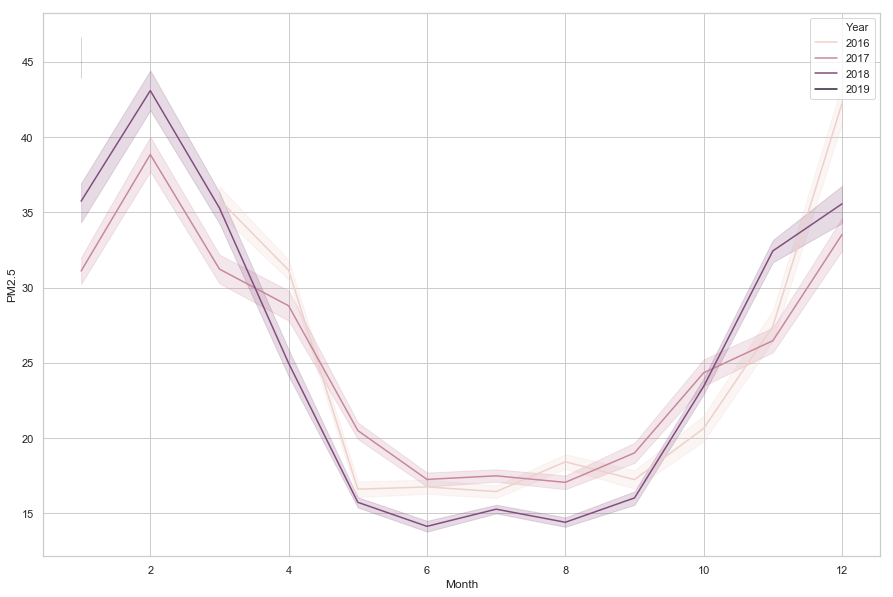

In [18]:
fi = plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

sns.lineplot(data=data,x='Month',y='PM2.5',hue = 'Year')

In [19]:
data.head(0)

,Year,Month,Day,Hour,dayofweek,dayofweek.1,dayofyear,PM2.5,Risk,datetime,season
datetime,,,,,,,,,,,


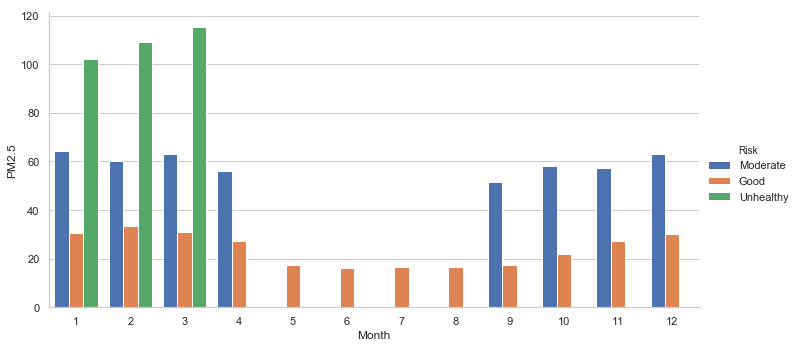

In [20]:

sns.catplot(x="Month", y="PM2.5",data=data, saturation=5,kind="bar", ci=None, aspect=2,hue = 'Risk')

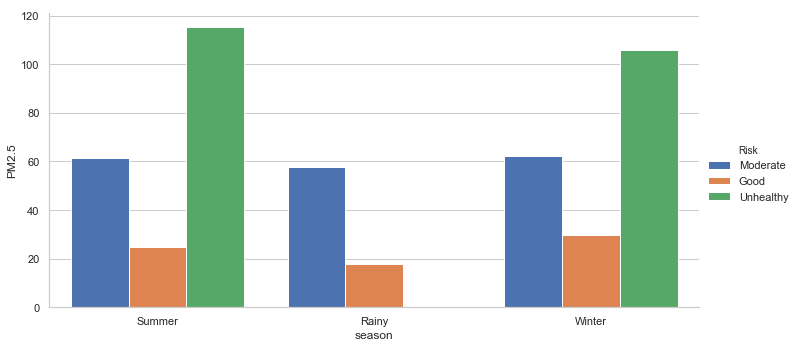

In [21]:
sns.catplot(x="season", y="PM2.5",data=data, saturation=10,kind="bar", ci=None, aspect=2,hue = 'Risk')

<Figure size 1080x720 with 0 Axes>

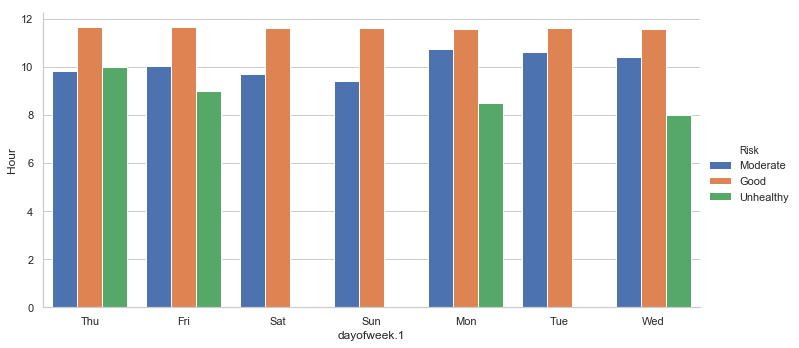

In [22]:
fi = plt.figure(figsize=(15,10))

sns.catplot(x="dayofweek.1", y="Hour",data=data, saturation=5,kind="bar", ci=None, aspect=2,hue = 'Risk')


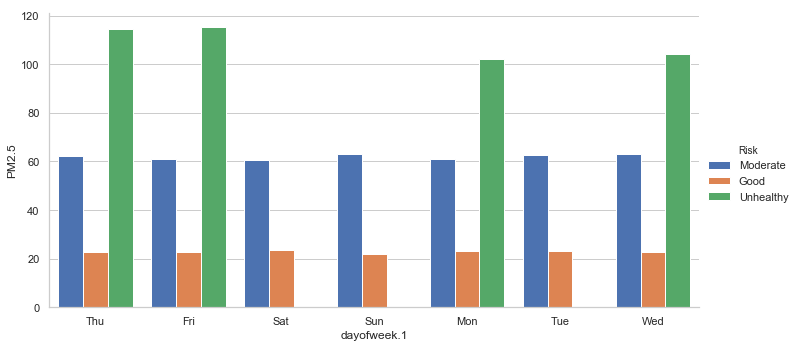

In [23]:
sns.catplot(x='dayofweek.1',y='PM2.5',data=data, saturation=5,kind="bar", ci=None, aspect=2,hue = 'Risk')

Text(0.5,66.5,'Day')

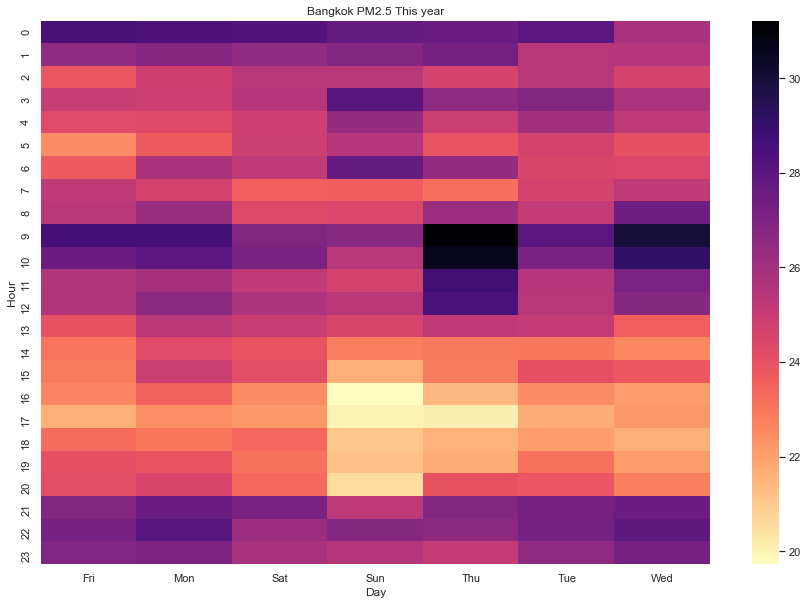

In [24]:
Thisyear = data.loc[(data['Year'] == 2018)]
fig, ax = plt.subplots(figsize=(15,10)) 
heat = Thisyear.pivot_table(values='PM2.5',index='Hour',columns='dayofweek.1',aggfunc='mean',dropna=True)
ax.set_title('Bangkok PM2.5 This year')
sns.heatmap(heat,cmap='magma_r')
ax.set_xlabel('Day')

In [26]:
data[['dayofweek','dayofweek.1','Hour','Year']]


,dayofweek,dayofweek.1,Hour,Year
datetime,,,,
2016-03-03 15:00:00,5,Thu,15,2016
2016-03-03 16:00:00,5,Thu,16,2016
2016-03-03 17:00:00,5,Thu,17,2016
2016-03-03 18:00:00,5,Thu,18,2016
2016-03-03 19:00:00,5,Thu,19,2016
2016-03-03 20:00:00,5,Thu,20,2016
2016-03-03 21:00:00,5,Thu,21,2016
2016-03-03 22:00:00,5,Thu,22,2016
2016-03-03 23:00:00,5,Thu,23,2016


In [27]:
data.loc[(data['Risk'] == 'Unhealthy')]

,Year,Month,Day,Hour,dayofweek,dayofweek.1,dayofyear,PM2.5,Risk,datetime,season
datetime,,,,,,,,,,,
2017-03-03 09:00:00,2017,3,3,9,6,Fri,62,115.4,Unhealthy,2017-03-03 09:00:00,Summer
2018-01-22 08:00:00,2018,1,22,8,2,Mon,22,103.4,Unhealthy,2018-01-22 08:00:00,Winter
2018-01-22 09:00:00,2018,1,22,9,2,Mon,22,100.8,Unhealthy,2018-01-22 09:00:00,Winter
2018-02-08 10:00:00,2018,2,8,10,5,Thu,39,114.3,Unhealthy,2018-02-08 10:00:00,Winter
2018-02-14 08:00:00,2018,2,14,8,4,Wed,45,104.1,Unhealthy,2018-02-14 08:00:00,Winter


In [28]:
weather = pd.read_csv('patumwan_weather.csv', parse_dates=[0], index_col=[0])
weather = weather.iloc[:,:14] # drop unused col
weather = weather.drop(columns=['windchill'])
weather = pd.get_dummies(weather, prefix=['wind_dir'])


In [30]:
weather_dt = pd.to_datetime(weather.index)
weather_hrly = weather.groupby([weather_dt.date, weather_dt.hour]).mean()
weather_hrly = weather_hrly.reset_index()
weather_hrly['level_0'] = weather_hrly['level_0'].apply(lambda x: x.strftime('%Y-%m-%d'))
weather_hrly['date'] = weather_hrly['date'].apply(lambda x: '{0:0>2}'.format(x))
weather_hrly.index = pd.to_datetime(weather_hrly['level_0'] + ' ' + weather_hrly['date'].apply(str), format='%Y-%m-%d %H')
weather_hrly = weather_hrly.drop(columns=['level_0','date'])
#weather_hrly = weather_hrly.fillna(weather_hrly.mean()) # fill nan with mean of column
weather_hrly.head(5)

,temperature,dewpoint,humidity,wind_speed,wind_gust_speed,wind_dir_degrees,pressure,heatindex,precip,precip_rate,...,wind_dir_NW,wind_dir_North,wind_dir_SE,wind_dir_SSE,wind_dir_SSW,wind_dir_SW,wind_dir_South,wind_dir_WNW,wind_dir_WSW,wind_dir_West
2016-03-02 17:00:00,28.000000,20.000,61.750000,1.2,2.8,117.0,1011.250,29.625000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-02 18:00:00,27.566667,20.000,63.333333,0.0,0.0,117.0,1010.500,29.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-02 19:00:00,27.250000,19.850,64.000000,0.0,0.0,117.0,1010.000,28.750000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-02 20:00:00,27.200000,19.850,64.250000,0.0,0.0,117.0,1009.700,28.650000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-02 21:00:00,26.850000,20.975,70.000000,0.8,3.6,115.0,1009.925,28.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data_merged = pd.concat([data, weather_hrly], axis=1, join_axes=[data.index])
#df_merged.columns.values
data_merged

,Year,Month,Day,Hour,dayofweek,dayofweek.1,dayofyear,PM2.5,Risk,datetime,...,wind_dir_NW,wind_dir_North,wind_dir_SE,wind_dir_SSE,wind_dir_SSW,wind_dir_SW,wind_dir_South,wind_dir_WNW,wind_dir_WSW,wind_dir_West
datetime,,,,,,,,,,,,,,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,5,Thu,63,62.9,Moderate,2016-03-03 15:00:00,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000
2016-03-03 16:00:00,2016,3,3,16,5,Thu,63,62.9,Moderate,2016-03-03 16:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
2016-03-03 17:00:00,2016,3,3,17,5,Thu,63,55.5,Moderate,2016-03-03 17:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000
2016-03-03 18:00:00,2016,3,3,18,5,Thu,63,55.5,Moderate,2016-03-03 18:00:00,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000
2016-03-03 19:00:00,2016,3,3,19,5,Thu,63,47.9,Good,2016-03-03 19:00:00,...,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000
2016-03-03 20:00:00,2016,3,3,20,5,Thu,63,43.6,Good,2016-03-03 20:00:00,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
2016-03-03 21:00:00,2016,3,3,21,5,Thu,63,28.6,Good,2016-03-03 21:00:00,...,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
2016-03-03 22:00:00,2016,3,3,22,5,Thu,63,33.6,Good,2016-03-03 22:00:00,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000
2016-03-03 23:00:00,2016,3,3,23,5,Thu,63,34.8,Good,2016-03-03 23:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000


PM2.5             1.000000
pressure          0.393460
wind_dir_NE       0.164482
wind_dir_NNE      0.140913
wind_dir_ENE      0.135612
wind_dir_NNW      0.109336
wind_dir_North    0.106679
Year              0.101283
wind_dir_NW       0.100891
wind_dir_SE       0.063553
Name: PM2.5, dtype: float64
dewpoint           -0.385505
humidity           -0.274888
wind_dir_WSW       -0.221088
heatindex          -0.168391
wind_speed         -0.162973
Month              -0.160328
wind_dir_degrees   -0.160226
dayofyear          -0.158544
wind_dir_SW        -0.148362
wind_gust_speed    -0.134261
Name: PM2.5, dtype: float64


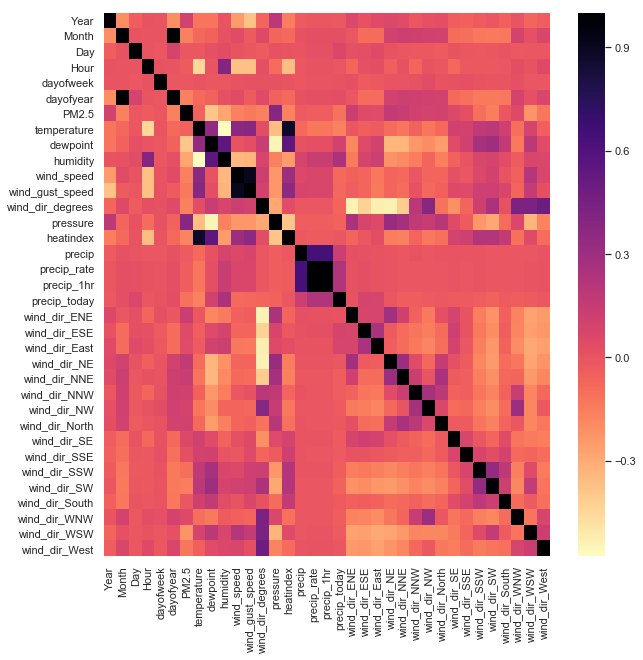

In [34]:
data_test = data_merged.drop(data.filter(regex='lag').columns, axis=1)

# calculate the correlation matrix
corr = data_test.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='magma_r',
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)

print(corr['PM2.5'].sort_values(ascending=False)[:10])
print(corr['PM2.5'].sort_values(ascending=True)[:10])

<Figure size 1080x720 with 0 Axes>

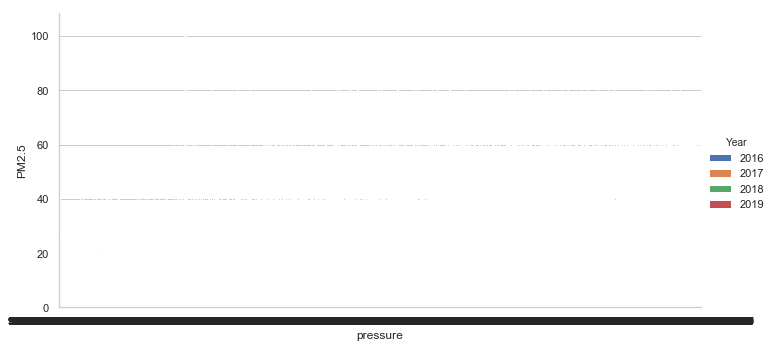

In [49]:
fi = plt.figure(figsize=(15,10))

sns.catplot(x="pressure", y="PM2.5",data=data_merged, saturation=5,kind="bar", ci=None, aspect=2,hue = 'Year')

In [47]:
data_merged['Risk']

KeyError: 'Risk'